# Exploratory Data Analysis: Tools and Ideas

Two key questions for <span style="color: purple"><b>exploratory data analysis</b></span> in statistics are:

1. Shape?
2. Outliers/skew?

For shape, we would like to know if the distribution appears to be uniform, exponential, binomial, bell-shaped or a fit with another common pattern. The key distribution in statistics is the **normal** (or bell-shaped) distribution. A *uniform* distribution is where all outcomes are equally likely? We have looked at distributions like the binomial, hypergeometric, geometric and negative binomial distributions. The most significant shape for introductory statistics is the<span style="color: purple"><b> normal distribution </b></span>since parametric statistical tests like the $z$-test, the $t$-test, ANOVA, and regression are built on assumptions of normality.

The second question we need to ask:<span style="color: purple"><b> do skew and outliers exist? </b></span>We need to know because we often must treat skewed data and data with outliers with great care and possibly different tools. The first steps of data analysis are to generate numeric descriptions of the data (descriptive statistics) and typical graphical displays of data like histograms, stem plots.

We will develop essential skills below including detecting outliers and creating the graphics needed to assess shape and skew.

```{sidebar} Data Visualization 
Data scientists use more robust analytic tools and have entire courses on data visualization which is the art of creating visual displays that tell a story about the data. To understand more about the groundbreaking work in data science, check out several data visualizations at the Pew Research Center regarding [political beliefs in the US](https://www.pewresearch.org/fact-tank/2014/12/29/our-favorite-pew-research-center-data-visualizations-from-2014). Also check out this [blog post](https://visme.co/blog/best-data-visualizations) where data science and artwork intersect</a> or this marketing blog with [16 great examples](https://blog.hubspot.com/marketing/great-data-visualization-examples) of data visualizations. As data science progresses, more and more exciting avenues exist for displaying and visualizing data. In this course, we will provide the basic numeric and graphic approaches to summarizing data. You're learning some R coding along the way. By the end of this course, if you're interested, a few hours will be all you will need to teach yourself to produce some pretty powerful visualizations of your own with RStudio.
```

## Data

Most often, we investigate single varible numeric data. In R, that data is typically stored as vector. Mathematically, we have the outcomes $x_i$ in the set $X$:

$$X \in \{x_1,x_2, \cdots, x_n\}$$

This data is stored in R as a column in a data frame or as a data vector. The vector is preferred when graphics or descriptives are generated.

## Parameters and Statistics

In statistics, we use two different sets of symbols to refer to the mean and standard deviation:

$$
\begin{array}{c|cc}
&\text{Population}&\text{Sample}\\ \hline
\text{AVG}&\mu&\bar{x}\\
\text{SD}&\sigma& s\\
\end{array}
$$

The population parameters $\mu$ and $\sigma$ are rarely known. Much of statistics is about estimating these parameters using the sample statistics $\bar{x}$ and $s$ respectively. For example, a poker player's distribution of winnings (per 100 hands) is a normal distribution. True win rates are not known. Winning poker players often suffer long colds streaks. Over time, things average out. We don't know Mandy's average win rate, $\mu$, but we can take sample of recent sessions and estimate it with $\bar{x}$.

```{admonition} Example 1
Suppose that Mandy's winnings from her most recent 20 cash poker sessions is given in the table below. Let's find the descriptive statistics and plot some standard statistical graphics using this data.
```

<table style="width:60%">
  <tr>
    <td style='text-align:center; vertical-align:middle'>28</td>
    <td style='text-align:center; vertical-align:middle'>11</td>
    <td style='text-align:center; vertical-align:middle'>18</td>
    <td style='text-align:center; vertical-align:middle'>35</td>
    <td style='text-align:center; vertical-align:middle'>36</td>
    <td style='text-align:center; vertical-align:middle'>6</td>
    <td style='text-align:center; vertical-align:middle'>-38</td>
    <td style='text-align:center; vertical-align:middle'>14</td>
    <td style='text-align:center; vertical-align:middle'>-19</td>
    <td style='text-align:center; vertical-align:middle'>43</td>
  </tr>
  <tr>
    <td style='text-align:center; vertical-align:middle'>-14</td>
    <td style='text-align:center; vertical-align:middle'>-30</td>
    <td style='text-align:center; vertical-align:middle'>-16</td>
    <td style='text-align:center; vertical-align:middle'>-25</td>
    <td style='text-align:center; vertical-align:middle'>0</td>
    <td style='text-align:center; vertical-align:middle'>40</td>
    <td style='text-align:center; vertical-align:middle'>16</td>
    <td style='text-align:center; vertical-align:middle'>-79</td>
    <td style='text-align:center; vertical-align:middle'>3</td>
    <td style='text-align:center; vertical-align:middle'>1</td>
  </tr>
</table>

The command is shown below using the concatenate function **c()**.

In [1]:
W <- c( 28, 11, 18, 35, 36, 6, -38, 14, -19, 43, -14, -30, -16, -25, 0, 40, 16, -79, 3, 11)

### Descriptive Statistics

We will use the code block we developed in the Descriptives Statistics section. We have changed the vector to $W$ and the title to *WINNINGS*.

In [2]:
cat('The standard descriptives for WINNINGS\n   Mean = ', round(mean(W),1),
    '\n   Standard Deviation = ', round(sd(W),2),
    '\n   Sample Size = ', length(W),
    '\n\nThe 5-number summary for WINNINGS')
summary(W)

The standard descriptives for WINNINGS
   Mean =  2 
   Standard Deviation =  30.57 
   Sample Size =  20 

The 5-number summary for WINNINGS

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -79.00  -16.75    8.50    2.00   20.50   43.00 

The most interesting point of analysis we can see already is that the mean is a good bit lower than the median. This can and often does indicate skew and a potential for outliers.

```{sidebar}
Check out the [Graphics Options](../A2a.ipynb) help section in the appendix where the graphical options are demonstrated.
```

## Shape: Histograms and Density Plots

The classical way of inspecting shape is the grand old histogram.

```{tip}
Recall that the **breaks =** option allows us to increase or decrease the number of bars by controlling the *bin width*, e.g. the length of the equally-spaced intervals along the $x$-axis.
```

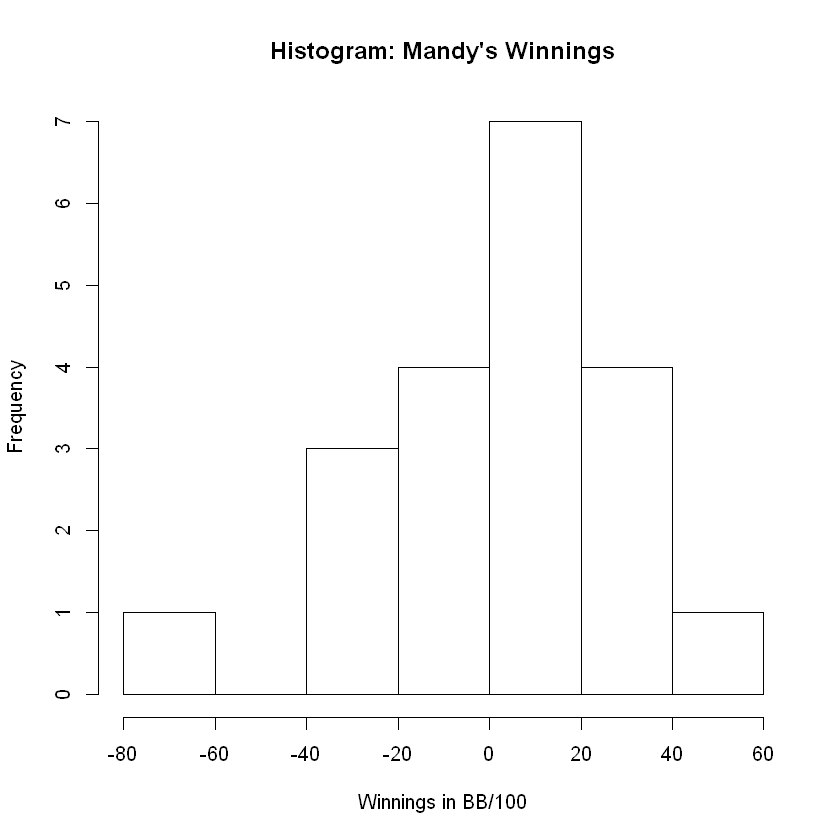

In [3]:
hist(W,
     main = "Histogram: Mandy's Winnings",
     xlab = 'Winnings in BB/100')

```{tip}
The $x$-axis is labeled in units of **Big Blinds per 100 Hands** which, in poker parlance, describes the winnings in terms of the expense of the game. 
```

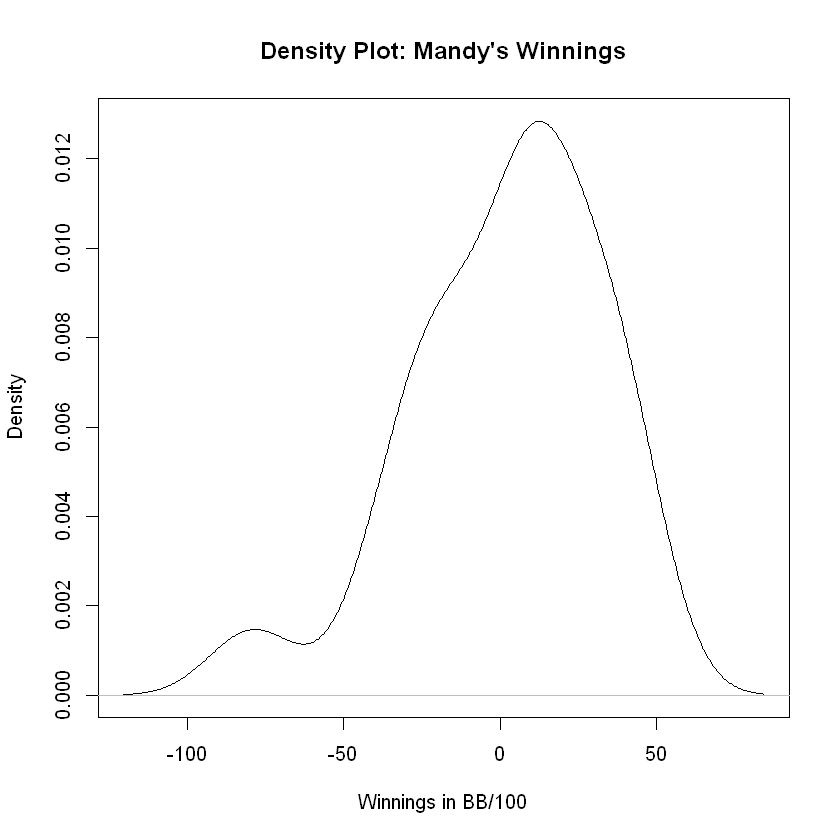

In [4]:
plot(density(W), main = "Density Plot: Mandy's Winnings",
     xlab = 'Winnings in BB/100')

### Analysis

The histogram and density plot confirm the skew to the left which confirms our alert. The mean was strikingly different from the median which made us suspicious of skew and outliers. The distribution appears to be **approximately normal** (or bell-shaped) and **skewed left**. The tail to the left comprises 4 bars of the histogram while the tail to the right comprises only 2. The direction of skew, if any, is in the same direction as the longest tail in the histogram or desnity plot.

## Standardized Scores

Standardized scores or $z$-scores are calculated from a data point $x$ as follows:

$$z = \frac{x-\mu}{\sigma}$$

where $\mu$ is the population mean and $\sigma$ is the popolutaion standard deviation. A $z$-score indicates both distance and direction from the mean, and its units are standard deviations. Note that, when we don't know $\mu$ or $\sigma$, or both, we substitute the sample statistics:

$$z = \frac{x-\bar{x}}{s}$$

## Standard Deviation and Outliers

The standard deviation can be thought of as a distance metric specific to the data set. Let’s take a moment to discover why. Given the data set $X=\{1,2,3,6\}$, we have $n=4$ and $\bar x=3$. For any data point, say, $x_1=1$, we can compute the directional distance or **deviation** from the mean:

$$d_i = x_i - \bar x$$

For this example, we have

$$d_1 = 1 -3 = -2$$

For deviations where $x_i<x$ (below average), then $d_i<0$, e.g. a negative deviation. Positive deviations indicate data points that are above average. If we treat the data set $X$ as a column vector $\vec x$ and calculate the deviation for each component, we have the deviation vector:

$$\vec{d_x} = \left(\begin{array}{c}x_1 - \bar x \\x_2 - \bar x \\ \vdots \\ x_n - \bar x \\ \end{array}\right)$$

The idea for the calculation of a **standard distance (or deviation)** beings with an application of the Euclidean distance metric to $\vec{d_x}$ . The magnitude of the deviation vector is given by:

$$\begin{align*}
\left\|\vec{d_x}\right\| &= \sqrt{(-2)^2+(-1)^2+(0)^2+(3)^2} \\
&=\sqrt{14}\\
&\approx 3.742
\end{align*}$$

## Outliers and Skew

We have two ways that we check for outliers in basic stastiscs:
1. **Numerically** using *mean* and *standard deviation*.
2. **Graphically** using the *box plot* and *5-number summary*.

### Checking for Outliers Numerically

Any data point more than 2 standard deviations away from the mean may be considered an outlier in a small data set where $n \leq 200$. 

We can use the $<$ and $>$ operators along with the **sum()** function to determine whether these conditions exist for data points in a vector. The value

$$\bar x - 2s$$

is the lower bound for outliers. Any data point eqaul to or below this value will be considered an outlier.

**Notice how the operator $<$ functions when applied to the data vector**.

In [7]:
W <= mean(W) - 2 * sd(W)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

The TRUE and FALSE values are 1's and 0's in R, so we can sum up the TRUE/FALSE vector to find the number of TRUE values in it.

In [8]:
sum(W <= mean(W) - 2 * sd(W))

[1] 1

Thus, we have one outlier to left or one data point that is more than 2 standard deviations below average. For outliers to right, we check the following:

In [9]:
sum(W >= mean(W) + 2 * sd(W))

[1] 0

We therefore find no outliers to right. We do not have any data points 2 standard deviations or more above the average.

### Checking for Outliers Graphically

The easiest way to check for outliers is to create box plot. While the box plot is a picture of the 5-number summary, most statistical software and graphing calculators also identify outliers while doing so.

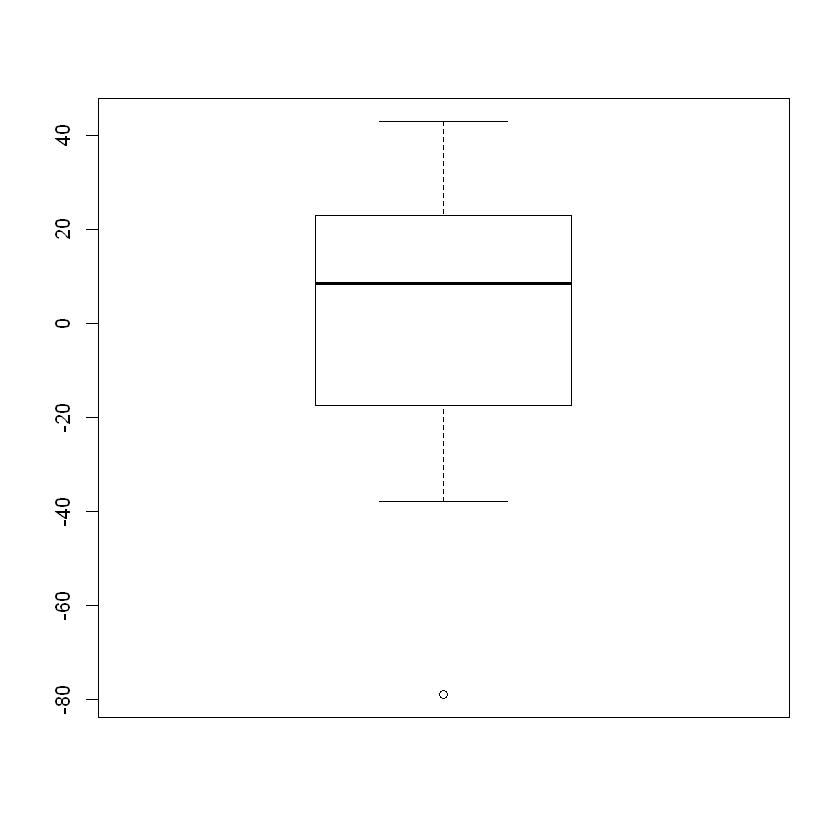

In [10]:
boxplot(W)

The box plot has identified a single outlier to the left and none to the right. The formula that is used to determine the cutoff values (called **fences**) is based on the values in the 5-number summary.

- Lower Fence = Q1 - 1.5 * IQR
- Upper Fence = Q3 + 1.5 * IQR

where IQR = Q3 - Q1 and indicates the "inner quartile range."

We can check for outliers using these fences just as we did above by using the **sum()** function and a $>$ or $<$ inequality.

### Skew

Outliers tend to cause skew. If we have several outliers to the left and none to the right, we generally can see skew to the left in the histogram or density plot. If we have outliers to the right but none to the left, we generally have skew to the right.

- Skewed **right** usually means the **mean is greater than the median**.
- Skewed **left** usually means the **mean is less than the median**.

This is how we guessed above that outliers and skew might be present. The above two statements can be reversed:

- If the **mean is significantly greater than the median**, we expect skew to the **right** and the majority of outliers to the right.
- If the **mean is significantly less than the median**, we expect skew to the **left** and the majority of outliers to the left.

When is the mean **significantly** greater or less than the median?

**Robb' Rule of Thumb** states that when the mean and median differ by a tenth of a standard deviation or more, we should expect skew and outliers. 

### Pivot Tables

We also have a quick ways to summarize 2 category variables in a 2-way table or pivot table:

In [11]:
pers <- read.csv('https://faculty.ung.edu/rsinn/data/personality.csv')
xtabs(~Sex + AccDate, data = pers)

   AccDate
Sex  N  Y
  F 28 46
  M 28 27

```{tip}
Note the statistical formula that is used above:

$$\text{~ Sex + AccDate}$$

The $+$ operator indicates a categorical variable to follow instead of a numeric one. R understands the leading ~ indicates that both of the variables are catogorical or qualitative, not numerc.
```

We use the same statistical formula in the call to the function **mosaicplot** which provides an intriguing visualization for analyzing 2 category variables.

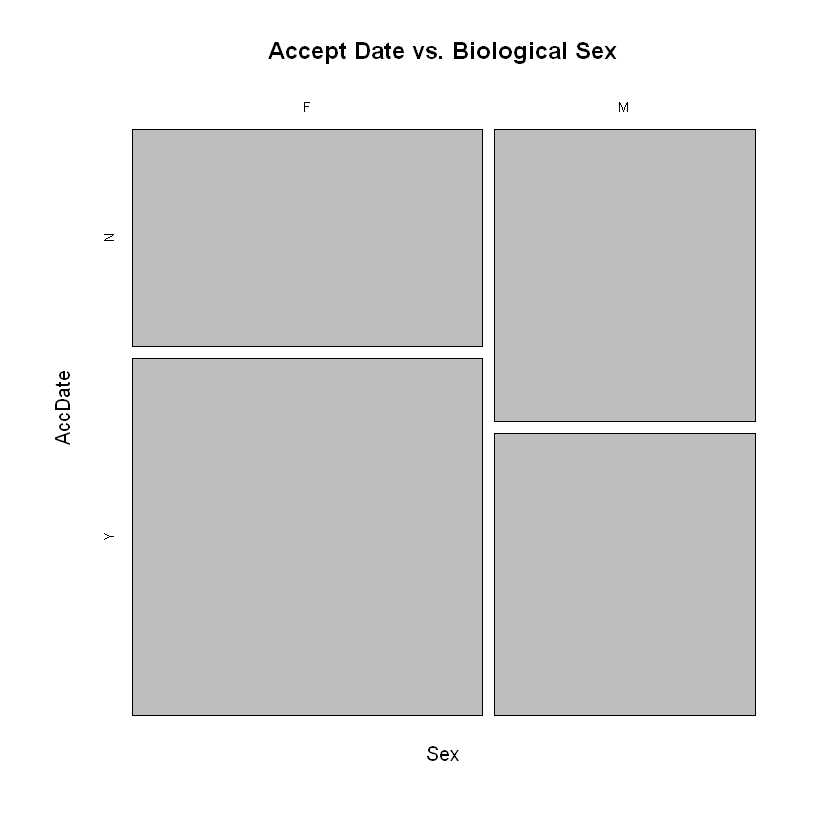

In [12]:
mosaicplot(~Sex + AccDate, data =pers, main = "Accept Date vs. Biological Sex")